In [1]:
!pip install plotly



[notice] A new release of pip available: 22.1.2 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import express as px

In [3]:
df = pd.read_csv('yeni_gayrimenkuller.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
df.shape

(10584, 21)

In [5]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10584 entries, 0 to 10583
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         10584 non-null  object 
 1   Address        10584 non-null  object 
 2   Rooms          10584 non-null  int64  
 3   Type           10584 non-null  object 
 4   Price          10584 non-null  float64
 5   Method         10584 non-null  object 
 6   SellerG        10584 non-null  object 
 7   Date           10584 non-null  object 
 8   Distance       10584 non-null  float64
 9   Postcode       10584 non-null  float64
 10  Bedroom2       10584 non-null  float64
 11  Bathroom       10584 non-null  float64
 12  Car            10530 non-null  float64
 13  Landsize       10584 non-null  float64
 14  BuildingArea   5458 non-null   float64
 15  YearBuilt      6360 non-null   float64
 16  CouncilArea    9686 non-null   object 
 17  Lattitude      10584 non-null  float64
 18  Longti

In [7]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                54
Landsize            0
BuildingArea     5126
YearBuilt        4224
CouncilArea       898
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [8]:
TARGET_FEATURE = 'Price'

Y = df[TARGET_FEATURE]

Y.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [9]:
numeric_features = df.select_dtypes(['int', 'float']).columns

numeric_features , len(numeric_features)
#categorical feature

(Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
        'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
        'Propertycount'],
       dtype='object'),
 13)

In [10]:
categorical_features = df.select_dtypes('object').columns

categorical_features, len(categorical_features)
#numerical feature

(Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
        'Regionname'],
       dtype='object'),
 8)

In [11]:
df.isna().sum().sort_values(ascending=False)

BuildingArea     5126
YearBuilt        4224
CouncilArea       898
Car                54
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

In [12]:
(df.isna().sum() * 100 / df.isna().count()).sort_values(ascending=False)

BuildingArea     48.431595
YearBuilt        39.909297
CouncilArea       8.484505
Car               0.510204
Suburb            0.000000
Bathroom          0.000000
Regionname        0.000000
Longtitude        0.000000
Lattitude         0.000000
Landsize          0.000000
Bedroom2          0.000000
Address           0.000000
Postcode          0.000000
Distance          0.000000
Date              0.000000
SellerG           0.000000
Method            0.000000
Price             0.000000
Type              0.000000
Rooms             0.000000
Propertycount     0.000000
dtype: float64

In [13]:
df[['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car']].describe(include='all')


,BuildingArea,YearBuilt,CouncilArea,Car
count,5458.000000,6360.000000,9686,10530.000000
unique,NaN,NaN,27,NaN
top,NaN,NaN,Moreland,NaN
freq,NaN,NaN,1046,NaN
mean,123.498070,1963.675943,NaN,1.415005
std,51.741013,36.391009,NaN,0.722778
min,0.000000,1857.000000,NaN,0.000000
25%,88.000000,1940.000000,NaN,1.000000
50%,117.000000,1970.000000,NaN,1.000000
75%,153.000000,1998.000000,NaN,2.000000


In [14]:
df.BuildingArea.value_counts(normalize=True, dropna=False) * 100

NaN       48.431595
120.00     0.878685
110.00     0.746410
100.00     0.689720
130.00     0.689720
            ...    
93.84      0.009448
110.87     0.009448
63.70      0.009448
103.60     0.009448
294.00     0.009448
Name: BuildingArea, Length: 374, dtype: float64

In [15]:
df.BuildingArea.describe()


count    5458.000000
mean      123.498070
std        51.741013
min         0.000000
25%        88.000000
50%       117.000000
75%       153.000000
max       294.000000
Name: BuildingArea, dtype: float64

In [16]:
df['CouncilArea'] = df['CouncilArea'].fillna('Moreland')


In [17]:
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].mode()[0])

In [18]:
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].mode()[0])

In [19]:
df['Car'] = df['Car'].fillna(df['Car'].median())

In [20]:
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].mean())


In [21]:
categorical_features = categorical_features.drop('Address')
categorical_features = categorical_features.drop('SellerG')
categorical_features = categorical_features.drop('Suburb')

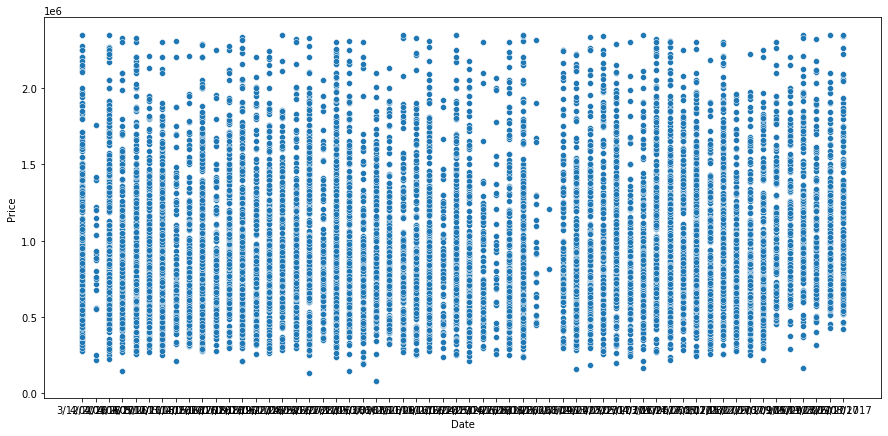

In [22]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='Date', y='Price', data=df)
plt.show()

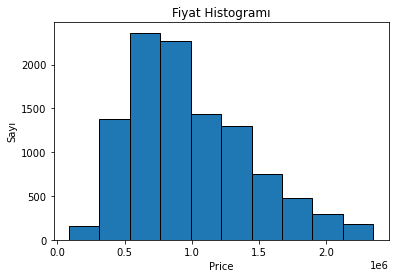

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Veri okuma
data = pd.read_csv('yeni_gayrimenkuller.csv')

# Histogram grafiği oluşturma
plt.hist(data['Price'], bins=10, edgecolor='black')

# Grafiği özelleştirme
plt.title('Fiyat Histogramı')
plt.xlabel('Price')
plt.ylabel('Sayı')

# Grafiği gösterme
plt.show()

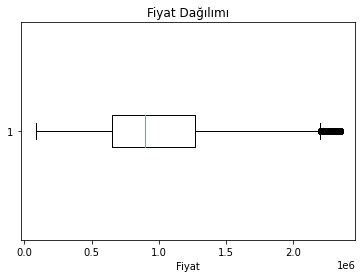

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Veri okuma
data = pd.read_csv('yeni_gayrimenkuller.csv')

# Box plot grafiği oluşturma
plt.boxplot(data['Price'], vert=False)

# Grafiği özelleştirme
plt.title('Fiyat Dağılımı')
plt.xlabel('Fiyat')

# Grafiği gösterme
plt.show()

In [25]:
corr_ = df[numeric_features].corr()
corr_

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.508569,0.349005,-0.058221,0.956837,0.498505,0.393979,0.464471,0.523210,-0.053730,0.071594,0.069694,-0.121505
Price,0.508569,1.000000,-0.094544,0.261256,0.494345,0.361649,0.210387,0.322058,0.430834,-0.295666,-0.251263,0.247497,0.037685
Distance,0.349005,-0.094544,1.000000,0.152469,0.353675,0.143795,0.342006,0.447386,0.186675,0.204666,-0.055219,0.283653,-0.231728
Postcode,-0.058221,0.261256,0.152469,1.000000,-0.053733,0.077688,0.021117,-0.018726,0.005575,-0.019688,-0.698972,0.642920,0.163390
Bedroom2,0.956837,0.494345,0.353675,-0.053733,1.000000,0.492386,0.393965,0.458519,0.512148,-0.043996,0.074424,0.074095,-0.120395
Bathroom,0.498505,0.361649,0.143795,0.077688,0.492386,1.000000,0.306292,0.120618,0.429792,0.161592,-0.065011,0.101925,-0.041502
Car,0.393979,0.210387,0.342006,0.021117,0.393965,0.306292,1.000000,0.344751,0.261412,0.152336,-0.005205,0.098069,-0.080140
Landsize,0.464471,0.322058,0.447386,-0.018726,0.458519,0.120618,0.344751,1.000000,0.283959,-0.080514,0.094632,0.145414,-0.132581
BuildingArea,0.523210,0.430834,0.186675,0.005575,0.512148,0.429792,0.261412,0.283959,1.000000,0.010335,0.001419,0.054745,-0.087456
YearBuilt,-0.053730,-0.295666,0.204666,-0.019688,-0.043996,0.161592,0.152336,-0.080514,0.010335,1.000000,0.031396,0.018354,-0.038134


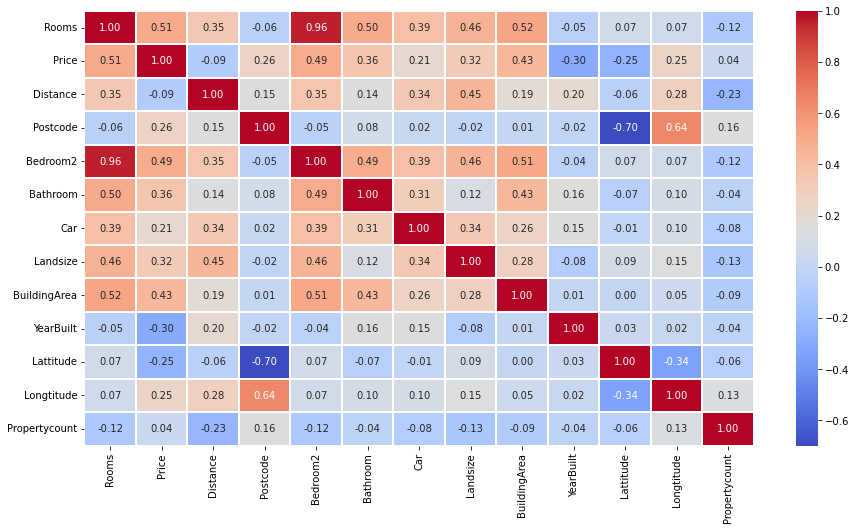

In [26]:
plt.figure(figsize=(15, 8))


sns.heatmap(corr_, fmt='.2f', linewidths=.1, annot=True, cmap='coolwarm')
plt.show()

In [27]:
df[categorical_features].value_counts()

Type  Method  Date        CouncilArea   Regionname           
h     S       3/09/2017   Moreland      Northern Metropolitan    30
              23/09/2017  Moreland      Western Metropolitan     29
              16/09/2017  Moreland      Northern Metropolitan    28
              23/09/2017  Moreland      Northern Metropolitan    27
              26/08/2017  Moreland      Southern Metropolitan    25
                                                                 ..
      VB      29/07/2017  Manningham    Eastern Metropolitan      1
                          Monash        Southern Metropolitan     1
                          Moreland      Northern Metropolitan     1
              3/06/2017   Banyule       Eastern Metropolitan      1
u     VB      8/10/2016   Port Phillip  Southern Metropolitan     1
Length: 4596, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
categorical_features = [ 'Type', 'Method', 'CouncilArea', 'Regionname']
categorical_features

['Type', 'Method', 'CouncilArea', 'Regionname']

In [30]:
for column in categorical_features:
    
    l_encoder = LabelEncoder()
    
    df[column] = l_encoder.fit_transform(df[column])
    

In [31]:
training_features = list(numeric_features) + list(categorical_features)

# Remove 'Price' Feature from list
training_features.remove('Price')

# show the final list
training_features

['Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount',
 'Type',
 'Method',
 'CouncilArea',
 'Regionname']

In [32]:
from sklearn.preprocessing import MinMaxScaler


In [33]:
minMaxNorm = MinMaxScaler()

minMaxNorm.fit(df[training_features])

MinMaxScaler()

In [34]:
X = minMaxNorm.transform(df[training_features]) 


In [35]:
X

array([[0.33333333, 0.10729614, 0.3236715 , ..., 0.25      , 1.        ,
        0.2       ],
       [0.33333333, 0.10729614, 0.3236715 , ..., 0.25      , 1.        ,
        0.2       ],
       [0.66666667, 0.10729614, 0.3236715 , ..., 0.75      , 1.        ,
        0.2       ],
       ...,
       [1.        , 0.7167382 , 0.72463768, ..., 0.25      , 0.69230769,
        0.6       ],
       [0.66666667, 0.29184549, 0.07729469, ..., 0.75      , 0.69230769,
        1.        ],
       [1.        , 0.27038627, 0.06280193, ..., 0.75      , 0.69230769,
        1.        ]])

In [36]:
Y = df['Price']  
Y 

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
10579     650000.0
10580     582000.0
10581    1245000.0
10582    1031000.0
10583    1285000.0
Name: Price, Length: 10584, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split


# LR

In [38]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.15, random_state=0)

In [39]:
print("Total size: ", df.shape[0])
print("Train size: ", train_X.shape, train_Y.shape)
print("Test size: ", test_X.shape, test_Y.shape)

Total size:  10584
Train size:  (8996, 16) (8996,)
Test size:  (1588, 16) (1588,)


In [40]:
models_summary = pd.DataFrame([],
                              columns=['model_name', 
                                       'prediction_score',
                                       'mean_absolute_error'
                                      ])
models_summary

,model_name,prediction_score,mean_absolute_error


In [41]:
lr_model = LinearRegression()

lr_model.fit(train_X, train_Y)

LinearRegression()

In [42]:
lr_model_predicted = lr_model.predict(test_X)
lr_model_predicted

array([ 627047.376707  , 1071994.47673993, 1512669.33222489, ...,
        907778.70949012, 1323241.66943389, 1277817.76552198])

In [43]:
lr_model_score = lr_model.score(test_X, test_Y )

lr_model_score

0.6624215552954177

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

linreg_model = LinearRegression()
linreg_model.fit(train_X, train_Y)
linreg_model_predicted = linreg_model.predict(test_X)
linreg_model_score = linreg_model.score(test_X, test_Y)
mae = mean_absolute_error(test_Y, linreg_model_predicted)
mse = mean_squared_error(test_Y, linreg_model_predicted)
r2 = r2_score(test_Y, linreg_model_predicted)
pearson_corr, _ = pearsonr(test_Y, linreg_model_predicted)
feature_importance = None  # linear regression model doesn't have feature importances

models_summary = models_summary.append({
    'model_name': linreg_model.__class__.__name__,
    'prediction_score': linreg_model_score,
    'mean_absolute_error': mae,
    'mean_squared_error': mse,
    'r2_score': r2,
    'feature_importance': feature_importance,
    'pearson_correlation': pearson_corr
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)



,model_name,prediction_score,mean_absolute_error,feature_importance,mean_squared_error,pearson_correlation,r2_score
0,LinearRegression,0.662422,197041.308263,None,6.556210e+10,0.813964,0.662422


In [45]:
models_summary

,model_name,prediction_score,mean_absolute_error,feature_importance,mean_squared_error,pearson_correlation,r2_score
0,LinearRegression,0.662422,197041.308263,None,6.556210e+10,0.813964,0.662422


# DT


In [46]:
from sklearn.tree import DecisionTreeRegressor


In [47]:
Dtree_model = DecisionTreeRegressor(random_state=1)

In [48]:
Dtree_model.fit(train_X, train_Y)

DecisionTreeRegressor(random_state=1)

In [49]:
Dtree_model_predicted = Dtree_model.predict(test_X)

In [50]:
Dtree_model_score = Dtree_model.score(test_X, test_Y)
Dtree_model_score

0.6366361952343578

In [51]:
mae = mean_absolute_error(Dtree_model_predicted, test_Y)

In [52]:
models_summary = models_summary.append({
    'model_name': Dtree_model.__class__.__name__,
    'prediction_score': Dtree_model_score,
    'mean_absolute_error' : mae
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)

,model_name,prediction_score,mean_absolute_error,feature_importance,mean_squared_error,pearson_correlation,r2_score
0,LinearRegression,0.662422,197041.308263,None,6.556210e+10,0.813964,0.662422
1,DecisionTreeRegressor,0.636636,187174.043451,NaN,NaN,NaN,NaN


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Dtree_model_predicted = Dtree_model.predict(test_X)
Dtree_model_score = Dtree_model.score(test_X, test_Y)
mae = mean_absolute_error(test_Y, Dtree_model_predicted)
mse = mean_squared_error(test_Y, Dtree_model_predicted)

models_summary = models_summary.append({
    'model_name': Dtree_model.__class__.__name__,
    'prediction_score': Dtree_model_score,
    'mean_absolute_error': mae,
    'mean_squared_error': mse
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)


,model_name,prediction_score,mean_absolute_error,feature_importance,mean_squared_error,pearson_correlation,r2_score
0,LinearRegression,0.662422,197041.308263,None,6.556210e+10,0.813964,0.662422
1,DecisionTreeRegressor,0.636636,187174.043451,None,NaN,NaN,NaN
2,DecisionTreeRegressor,0.636636,187174.043451,NaN,7.056995e+10,NaN,NaN


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Dtree_model_predicted = Dtree_model.predict(test_X)
Dtree_model_score = Dtree_model.score(test_X, test_Y)
mae = mean_absolute_error(test_Y, Dtree_model_predicted)
mse = mean_squared_error(test_Y, Dtree_model_predicted)
r2 = r2_score(test_Y, Dtree_model_predicted)

models_summary = models_summary.append({
    'model_name': Dtree_model.__class__.__name__,
    'prediction_score': Dtree_model_score,
    'mean_absolute_error': mae,
    'mean_squared_error': mse,
    'r2_score': r2
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)


,model_name,prediction_score,mean_absolute_error,feature_importance,mean_squared_error,pearson_correlation,r2_score
0,LinearRegression,0.662422,197041.308263,None,6.556210e+10,0.813964,0.662422
1,DecisionTreeRegressor,0.636636,187174.043451,None,NaN,NaN,NaN
2,DecisionTreeRegressor,0.636636,187174.043451,None,7.056995e+10,NaN,NaN
3,DecisionTreeRegressor,0.636636,187174.043451,NaN,7.056995e+10,NaN,0.636636


In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Dtree_model_predicted = Dtree_model.predict(test_X)
Dtree_model_score = Dtree_model.score(test_X, test_Y)
mae = mean_absolute_error(test_Y, Dtree_model_predicted)
mse = mean_squared_error(test_Y, Dtree_model_predicted)
r2 = r2_score(test_Y, Dtree_model_predicted)
feature_importance = Dtree_model.feature_importances_

models_summary = models_summary.append({
    'model_name': Dtree_model.__class__.__name__,
    'prediction_score': Dtree_model_score,
    'mean_absolute_error': mae,
    'mean_squared_error': mse,
    'r2_score': r2,
    'feature_importance': feature_importance
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)


,model_name,prediction_score,mean_absolute_error,feature_importance,mean_squared_error,pearson_correlation,r2_score
0,LinearRegression,0.662422,197041.308263,None,6.556210e+10,0.813964,0.662422
1,DecisionTreeRegressor,0.636636,187174.043451,None,NaN,NaN,NaN
2,DecisionTreeRegressor,0.636636,187174.043451,None,7.056995e+10,NaN,NaN
3,DecisionTreeRegressor,0.636636,187174.043451,None,7.056995e+10,NaN,0.636636
4,DecisionTreeRegressor,0.636636,187174.043451,"[0.053760128885812976, 0.1638299924340545, 0.1...",7.056995e+10,NaN,0.636636


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

Dtree_model_predicted = Dtree_model.predict(test_X)
Dtree_model_score = Dtree_model.score(test_X, test_Y)
mae = mean_absolute_error(test_Y, Dtree_model_predicted)
mse = mean_squared_error(test_Y, Dtree_model_predicted)
r2 = r2_score(test_Y, Dtree_model_predicted)
feature_importance = Dtree_model.feature_importances_
pearson_corr, _ = pearsonr(test_Y, Dtree_model_predicted)

models_summary = models_summary.append({
    'model_name': Dtree_model.__class__.__name__,
    'prediction_score': Dtree_model_score,
    'mean_absolute_error': mae,
    'mean_squared_error': mse,
    'r2_score': r2,
    'feature_importance': feature_importance,
    'pearson_correlation': pearson_corr
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)


,model_name,prediction_score,mean_absolute_error,feature_importance,mean_squared_error,pearson_correlation,r2_score
0,LinearRegression,0.662422,197041.308263,None,6.556210e+10,0.813964,0.662422
1,DecisionTreeRegressor,0.636636,187174.043451,None,NaN,NaN,NaN
2,DecisionTreeRegressor,0.636636,187174.043451,None,7.056995e+10,NaN,NaN
3,DecisionTreeRegressor,0.636636,187174.043451,None,7.056995e+10,NaN,0.636636
4,DecisionTreeRegressor,0.636636,187174.043451,"[0.053760128885812976, 0.1638299924340545, 0.1...",7.056995e+10,NaN,0.636636
5,DecisionTreeRegressor,0.636636,187174.043451,"[0.053760128885812976, 0.1638299924340545, 0.1...",7.056995e+10,0.815677,0.636636


# RF

In [57]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  BaggingRegressor 
from sklearn.ensemble import  AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor

In [58]:
RFRModel = RandomForestRegressor(max_leaf_nodes=100, random_state=1)


In [59]:
RFRModel.fit(train_X, train_Y)


RandomForestRegressor(max_leaf_nodes=100, random_state=1)

In [60]:
RFRModel_predicted = RFRModel.predict(test_X)


In [61]:
RFRModel_score = RFRModel.score(test_X, test_Y)
RFRModel_score

0.7690383527950345

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

rf_model = RandomForestRegressor()
rf_model.fit(train_X, train_Y)
rf_model_predicted = rf_model.predict(test_X)
rf_model_score = rf_model.score(test_X, test_Y)
mae = mean_absolute_error(test_Y, rf_model_predicted)
mse = mean_squared_error(test_Y, rf_model_predicted)
r2 = r2_score(test_Y, rf_model_predicted)
pearson_corr, _ = pearsonr(test_Y, rf_model_predicted)
feature_importance = rf_model.feature_importances_

models_summary = models_summary.append({
    'model_name': rf_model.__class__.__name__,
    'prediction_score': rf_model_score,
    'mean_absolute_error': mae,
    'mean_squared_error': mse,
    'r2_score': r2,
    'feature_importance': feature_importance,
    'pearson_correlation': pearson_corr
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)


,model_name,prediction_score,mean_absolute_error,feature_importance,mean_squared_error,pearson_correlation,r2_score
6,RandomForestRegressor,0.816629,133367.614061,"[0.05244049389351355, 0.15926668819326845, 0.1...",3.561307e+10,0.904106,0.816629
0,LinearRegression,0.662422,197041.308263,None,6.556210e+10,0.813964,0.662422
1,DecisionTreeRegressor,0.636636,187174.043451,None,NaN,NaN,NaN
2,DecisionTreeRegressor,0.636636,187174.043451,None,7.056995e+10,NaN,NaN
3,DecisionTreeRegressor,0.636636,187174.043451,None,7.056995e+10,NaN,0.636636
4,DecisionTreeRegressor,0.636636,187174.043451,"[0.053760128885812976, 0.1638299924340545, 0.1...",7.056995e+10,NaN,0.636636
5,DecisionTreeRegressor,0.636636,187174.043451,"[0.053760128885812976, 0.1638299924340545, 0.1...",7.056995e+10,0.815677,0.636636


# BAGGING

In [63]:
BGR_model = BaggingRegressor()
BGR_model.fit(train_X, train_Y)
BGR_model_predicted = BGR_model.predict(test_X)
BGR_model_score = BGR_model.score(test_X, test_Y)


In [64]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

bagging_model = BaggingRegressor()
bagging_model.fit(train_X, train_Y)
bagging_model_predicted = bagging_model.predict(test_X)
bagging_model_score = bagging_model.score(test_X, test_Y)
mae = mean_absolute_error(test_Y, bagging_model_predicted)
mse = mean_squared_error(test_Y, bagging_model_predicted)
r2 = r2_score(test_Y, bagging_model_predicted)
pearson_corr, _ = pearsonr(test_Y, bagging_model_predicted)
feature_importance = None  # BaggingRegressor doesn't have feature importances

models_summary = models_summary.append({
    'model_name': bagging_model.__class__.__name__,
    'prediction_score': bagging_model_score,
    'mean_absolute_error': mae,
    'mean_squared_error': mse,
    'r2_score': r2,
    'feature_importance': feature_importance,
    'pearson_correlation': pearson_corr
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)


,model_name,prediction_score,mean_absolute_error,feature_importance,mean_squared_error,pearson_correlation,r2_score
6,RandomForestRegressor,0.816629,133367.614061,"[0.05244049389351355, 0.15926668819326845, 0.1...",3.561307e+10,0.904106,0.816629
7,BaggingRegressor,0.791527,142722.343037,None,4.048809e+10,0.889693,0.791527
0,LinearRegression,0.662422,197041.308263,None,6.556210e+10,0.813964,0.662422
1,DecisionTreeRegressor,0.636636,187174.043451,None,NaN,NaN,NaN
2,DecisionTreeRegressor,0.636636,187174.043451,None,7.056995e+10,NaN,NaN
3,DecisionTreeRegressor,0.636636,187174.043451,None,7.056995e+10,NaN,0.636636
4,DecisionTreeRegressor,0.636636,187174.043451,"[0.053760128885812976, 0.1638299924340545, 0.1...",7.056995e+10,NaN,0.636636
5,DecisionTreeRegressor,0.636636,187174.043451,"[0.053760128885812976, 0.1638299924340545, 0.1...",7.056995e+10,0.815677,0.636636


# ADA

In [65]:
ADB_model = AdaBoostRegressor()
ADB_model.fit(train_X, train_Y)
ADB_model_predicted = ADB_model.predict(test_X)
ADB_model_score = ADB_model.score(test_X, test_Y)

In [66]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

adaboost_model = AdaBoostRegressor()
adaboost_model.fit(train_X, train_Y)
adaboost_model_predicted = adaboost_model.predict(test_X)
adaboost_model_score = adaboost_model.score(test_X, test_Y)
mae = mean_absolute_error(test_Y, adaboost_model_predicted)
mse = mean_squared_error(test_Y, adaboost_model_predicted)
r2 = r2_score(test_Y, adaboost_model_predicted)
pearson_corr, _ = pearsonr(test_Y, adaboost_model_predicted)
feature_importance = adaboost_model.feature_importances_

models_summary = models_summary.append({
    'model_name': adaboost_model.__class__.__name__,
    'prediction_score': adaboost_model_score,
    'mean_absolute_error': mae,
    'mean_squared_error': mse,
    'r2_score': r2,
    'feature_importance': feature_importance,
    'pearson_correlation': pearson_corr
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)



,model_name,prediction_score,mean_absolute_error,feature_importance,mean_squared_error,pearson_correlation,r2_score
6,RandomForestRegressor,0.816629,133367.614061,"[0.05244049389351355, 0.15926668819326845, 0.1...",3.561307e+10,0.904106,0.816629
7,BaggingRegressor,0.791527,142722.343037,None,4.048809e+10,0.889693,0.791527
0,LinearRegression,0.662422,197041.308263,None,6.556210e+10,0.813964,0.662422
1,DecisionTreeRegressor,0.636636,187174.043451,None,NaN,NaN,NaN
2,DecisionTreeRegressor,0.636636,187174.043451,None,7.056995e+10,NaN,NaN
3,DecisionTreeRegressor,0.636636,187174.043451,None,7.056995e+10,NaN,0.636636
4,DecisionTreeRegressor,0.636636,187174.043451,"[0.053760128885812976, 0.1638299924340545, 0.1...",7.056995e+10,NaN,0.636636
5,DecisionTreeRegressor,0.636636,187174.043451,"[0.053760128885812976, 0.1638299924340545, 0.1...",7.056995e+10,0.815677,0.636636
8,AdaBoostRegressor,0.542380,247881.764403,"[0.06058352530925058, 0.10458238162524455, 0.0...",8.887566e+10,0.808816,0.542380


# GRADIENT

In [67]:
GBR_model = GradientBoostingRegressor(n_estimators=150, random_state=1)
GBR_model.fit(train_X, train_Y)
GBR_model_predicted = GBR_model.predict(test_X)
GBR_model_score = GBR_model.score(test_X, test_Y)

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

gb_model = GradientBoostingRegressor()
gb_model.fit(train_X, train_Y)
gb_model_predicted = gb_model.predict(test_X)
gb_model_score = gb_model.score(test_X, test_Y)
mae = mean_absolute_error(test_Y, gb_model_predicted)
mse = mean_squared_error(test_Y, gb_model_predicted)
r2 = r2_score(test_Y, gb_model_predicted)
pearson_corr, _ = pearsonr(test_Y, gb_model_predicted)
feature_importance = gb_model.feature_importances_

models_summary = models_summary.append({
    'model_name': gb_model.__class__.__name__,
    'prediction_score': gb_model_score,
    'mean_absolute_error': mae,
    'mean_squared_error': mse,
    'r2_score': r2,
    'feature_importance': feature_importance,
    'pearson_correlation': pearson_corr
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)


,model_name,prediction_score,mean_absolute_error,feature_importance,mean_squared_error,pearson_correlation,r2_score
6,RandomForestRegressor,0.816629,133367.614061,"[0.05244049389351355, 0.15926668819326845, 0.1...",3.561307e+10,0.904106,0.816629
9,GradientBoostingRegressor,0.794758,146142.888033,"[0.11876676315261858, 0.1637418613732259, 0.17...",3.986061e+10,0.893334,0.794758
7,BaggingRegressor,0.791527,142722.343037,None,4.048809e+10,0.889693,0.791527
0,LinearRegression,0.662422,197041.308263,None,6.556210e+10,0.813964,0.662422
1,DecisionTreeRegressor,0.636636,187174.043451,None,NaN,NaN,NaN
2,DecisionTreeRegressor,0.636636,187174.043451,None,7.056995e+10,NaN,NaN
3,DecisionTreeRegressor,0.636636,187174.043451,None,7.056995e+10,NaN,0.636636
4,DecisionTreeRegressor,0.636636,187174.043451,"[0.053760128885812976, 0.1638299924340545, 0.1...",7.056995e+10,NaN,0.636636
5,DecisionTreeRegressor,0.636636,187174.043451,"[0.053760128885812976, 0.1638299924340545, 0.1...",7.056995e+10,0.815677,0.636636
8,AdaBoostRegressor,0.542380,247881.764403,"[0.06058352530925058, 0.10458238162524455, 0.0...",8.887566e+10,0.808816,0.542380


# XBOOST

In [69]:
pip install xgboost



[notice] A new release of pip available: 22.1.2 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [70]:
from xgboost import XGBRegressor

In [71]:
XGBR_model = XGBRegressor()
XGBR_model.fit(train_X, train_Y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [72]:
XGBR_model_predicted = XGBR_model.predict(test_X)
XGBR_model_score = XGBR_model.score(test_X, test_Y)
XGBR_model_score


0.8259076892626588

In [73]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

xgb_model = XGBRegressor()
xgb_model.fit(train_X, train_Y)
xgb_model_predicted = xgb_model.predict(test_X)
xgb_model_score = xgb_model.score(test_X, test_Y)
mae = mean_absolute_error(test_Y, xgb_model_predicted)
mse = mean_squared_error(test_Y, xgb_model_predicted)
r2 = r2_score(test_Y, xgb_model_predicted)
pearson_corr, _ = pearsonr(test_Y, xgb_model_predicted)
feature_importance = xgb_model.feature_importances_

models_summary = models_summary.append({
    'model_name': xgb_model.__class__.__name__,
    'prediction_score': xgb_model_score,
    'mean_absolute_error': mae,
    'mean_squared_error': mse,
    'r2_score': r2,
    'feature_importance': feature_importance,
    'pearson_correlation': pearson_corr
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)


,model_name,prediction_score,mean_absolute_error,feature_importance,mean_squared_error,pearson_correlation,r2_score
10,XGBRegressor,0.825908,131702.227114,"[0.040901944, 0.06029004, 0.1535604, 0.0632953...",3.381098e+10,0.908979,0.825908
6,RandomForestRegressor,0.816629,133367.614061,"[0.05244049389351355, 0.15926668819326845, 0.1...",3.561307e+10,0.904106,0.816629
9,GradientBoostingRegressor,0.794758,146142.888033,"[0.11876676315261858, 0.1637418613732259, 0.17...",3.986061e+10,0.893334,0.794758
7,BaggingRegressor,0.791527,142722.343037,None,4.048809e+10,0.889693,0.791527
0,LinearRegression,0.662422,197041.308263,None,6.556210e+10,0.813964,0.662422
1,DecisionTreeRegressor,0.636636,187174.043451,None,NaN,NaN,NaN
2,DecisionTreeRegressor,0.636636,187174.043451,None,7.056995e+10,NaN,NaN
3,DecisionTreeRegressor,0.636636,187174.043451,None,7.056995e+10,NaN,0.636636
4,DecisionTreeRegressor,0.636636,187174.043451,"[0.053760128885812976, 0.1638299924340545, 0.1...",7.056995e+10,NaN,0.636636
5,DecisionTreeRegressor,0.636636,187174.043451,"[0.053760128885812976, 0.1638299924340545, 0.1...",7.056995e+10,0.815677,0.636636


In [74]:
print(models_summary.isnull().sum())

model_name             0
prediction_score       0
mean_absolute_error    0
feature_importance     5
mean_squared_error     1
pearson_correlation    4
r2_score               2
dtype: int64
